In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier

In [ ]:
df=pd.read_csv('/content/iris.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


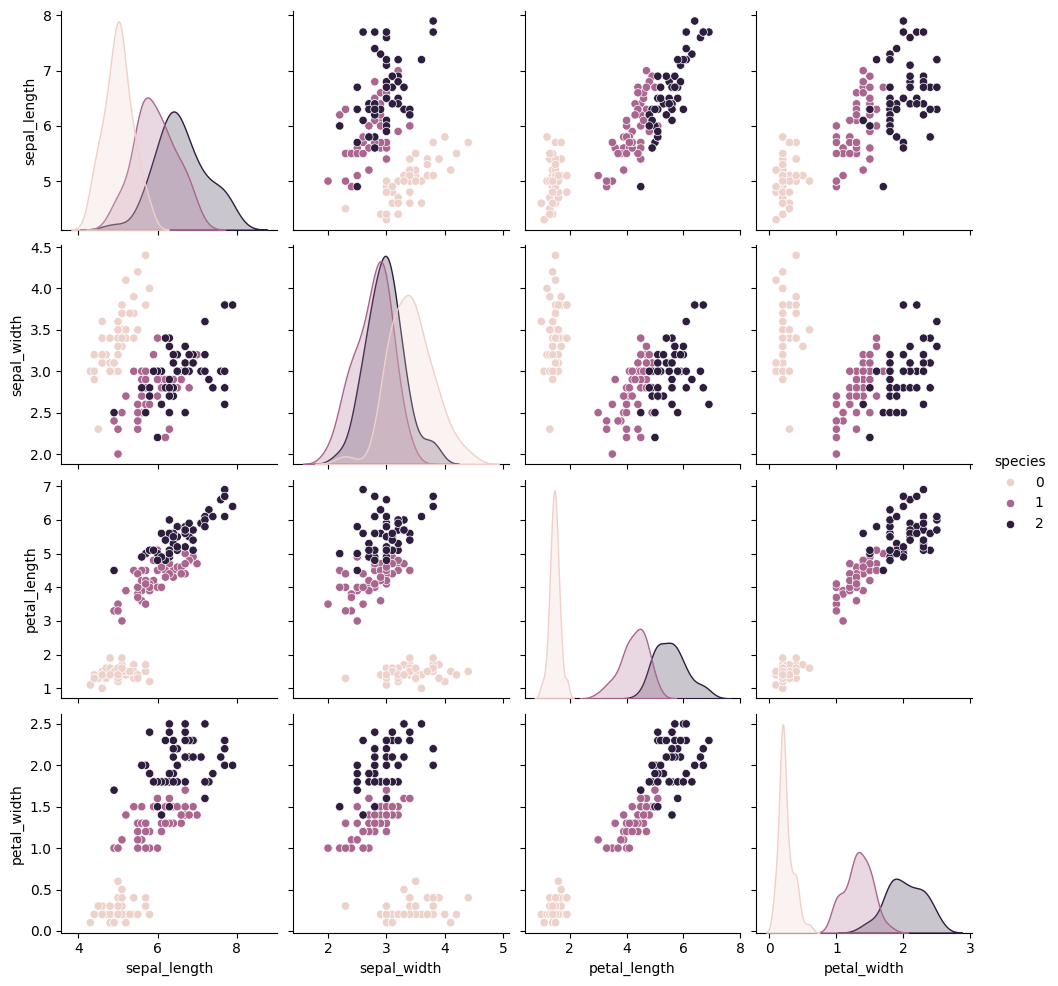

In [ ]:
import seaborn as sns
sns.pairplot(df,hue='species')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
X=df.drop('species',axis=1)
Y=df['species']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
models=[('lr',LogisticRegression()),('dt',DecisionTreeClassifier()),('svm',SVC())]

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
for m,n in models:
  scores=cross_val_score(n,x_train,y_train,cv=5)
  print(f'{m} : {np.mean(scores)}')

lr : 0.9666666666666666
dt : 0.95
svm : 0.95


In [ ]:
vc=VotingClassifier(estimators=models,voting='hard')

In [ ]:
np.mean(cross_val_score(vc,x_train,y_train,cv=5))

np.float64(0.9666666666666666)